In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

def get_acuracy(y_pred, y_real):
    y_comparison = np.array(y_pred) == np.array(y_real)
    return sum(y_comparison)/len(y_comparison)

def get_predictions(X,theta,thresh):
    pred_X = X.dot(theta).apply(sigmoid)
    return (pred_X>=thresh).astype(int)
    
def CostFun(theta, X, Y):
    return ((X.dot(theta).apply(sigmoid).apply(np.log).mul(Y) + (1-X.dot(theta).apply(sigmoid)).apply(np.log).mul(1-Y)).sum())*(-1)

def gradient(theta, X, Y):
    return ((X.dot(theta).apply(sigmoid)-Y).transpose().dot(X))

def regres_params(init_theta, X, Y, itr, alpha, log_and_plot):
    m = len(X)
    if log_and_plot:
        num_run = []
        cost_run = []
        print('alpha = {}\nnum_itrerations  {}'.format(alpha,itr))
        print('initial\ncost {}\ntheta  {}'.format(CostFun(init_theta, X, Y),init_theta))
    for i in range(itr):
        init_theta = init_theta - (alpha/m)*gradient(init_theta, X, Y)
        if log_and_plot:
            num_run.append(i)
            cost_run.append(CostFun(init_theta, X, Y))
    if log_and_plot:
        print('\n end\ncost {}\ntheta  {}'.format(CostFun(init_theta, X, Y),init_theta))
        plt.plot(cost_run)
        plt.show()
        plt.clf()
    return [init_theta,CostFun(init_theta, X, Y)]

#idea: break data into IS/OS and measure acc on OS
def regress_feature_selection(feature_list, all_data,itr,alpha,thresh):
    X = all_data[feature_list].copy()
    Y = all_data['Survived'].copy()
    
    initial_theta = [0 for i in range(len(feature_list))]
    
    reg_rez = regres_params(initial_theta, X, Y, itr, alpha, False)
    
    return [get_acuracy(get_predictions(X,reg_rez[0],thresh), Y),reg_rez[1],reg_rez[0]]
    
    
#def optimize_theta(theta, X, Y):

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
parameter_list = ['Age','Sex','SibSp','Parch','Ticket','Fare','Cabin','Embarked', 'Name', 'Pclass', 'Survived', 'PassengerId']

for par in parameter_list:
    print('Num nans in {} : {}'.format(par, train_data[par].isna().astype(int).sum()))

Num nans in Age : 177
Num nans in Sex : 0
Num nans in SibSp : 0
Num nans in Parch : 0
Num nans in Ticket : 0
Num nans in Fare : 0
Num nans in Cabin : 687
Num nans in Embarked : 2
Num nans in Name : 0
Num nans in Pclass : 0
Num nans in Survived : 0
Num nans in PassengerId : 0


In [6]:
train_data[train_data['Age'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...,...
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
868,869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S
878,879,0,3,"Laleff, Mr. Kristo",male,NaN,0,0,349217,7.8958,NaN,S


In [7]:
parameter_list2 = ['Age','SibSp','Parch','Fare', 'Pclass', 'Survived', 'PassengerId']
for par in parameter_list2:
    print('\nstats for {}\nmax :{}   min :{}\naverage : {}\nnum_nans : {}'.format(par, train_data[par].max(), train_data[par].min(), train_data[par].mean(),train_data[par].isna().astype(int).sum()))


stats for Age
max :80.0   min :0.42
average : 29.69911764705882
num_nans : 177

stats for SibSp
max :8   min :0
average : 0.5230078563411896
num_nans : 0

stats for Parch
max :6   min :0
average : 0.38159371492704824
num_nans : 0

stats for Fare
max :512.3292   min :0.0
average : 32.204207968574636
num_nans : 0

stats for Pclass
max :3   min :1
average : 2.308641975308642
num_nans : 0

stats for Survived
max :1   min :0
average : 0.3838383838383838
num_nans : 0

stats for PassengerId
max :891   min :1
average : 446.0
num_nans : 0


In [8]:
#numerical features attempt (ideas: try to use regression to predict missing age values,)
#numerical features are 'Pclass','Sex','Age','SibSp','Parch','Fare'
train_data1 = train_data.copy()
train_data1.loc[train_data1['Age'].isna(),'Age'] = train_data1['Age'].median()
train_data1['Sex'] = (train_data1['Sex'] == 'female').astype(int)
train_data1['Age'] = train_data1['Age']/train_data1['Age'].max()
train_data1['SibSp'] = train_data1['SibSp']/train_data1['SibSp'].max()
train_data1['Parch'] = train_data1['Parch']/train_data1['Parch'].max()
train_data1['Fare'] = train_data1['Fare']/train_data1['Fare'].max()
train_data1['Pclass'] = train_data1['Pclass']/train_data1['Pclass'].max()


X = train_data1[['Pclass','Sex','Age','SibSp','Parch','Fare']].copy()
Y = train_data1['Survived'].copy()



parameter_list = ['Pclass','Sex','Age','SibSp','Parch','Fare']

for par in parameter_list:
    print('Num nans in {} : {}'.format(par, X[par].isna().astype(int).sum()))
print('Num nans in Y : {}'.format( Y.isna().astype(int).sum()))

Num nans in Pclass : 0
Num nans in Sex : 0
Num nans in Age : 0
Num nans in SibSp : 0
Num nans in Parch : 0
Num nans in Fare : 0
Num nans in Y : 0


alpha = 12
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 406.1174830617407
theta  Pclass   -1.757421
Sex       2.752097
Age      -0.838538
SibSp    -1.970645
Parch    -0.611103
Fare      2.755617
dtype: float64


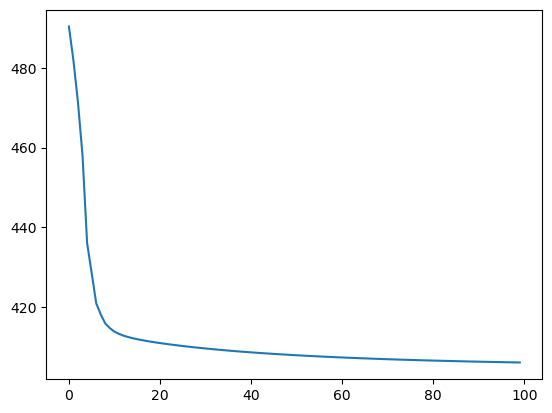

[Pclass   -1.757421
 Sex       2.752097
 Age      -0.838538
 SibSp    -1.970645
 Parch    -0.611103
 Fare      2.755617
 dtype: float64,
 406.1174830617407]

<Figure size 640x480 with 0 Axes>

In [9]:
regres_params([0,0,0,0,0,0], X, Y, 100, 12, True)

alpha = 1
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 414.12206297887633
theta  Pclass   -1.840371
Sex       2.582810
Age      -0.481107
SibSp    -0.432077
Parch    -0.099002
Fare      0.445067
dtype: float64


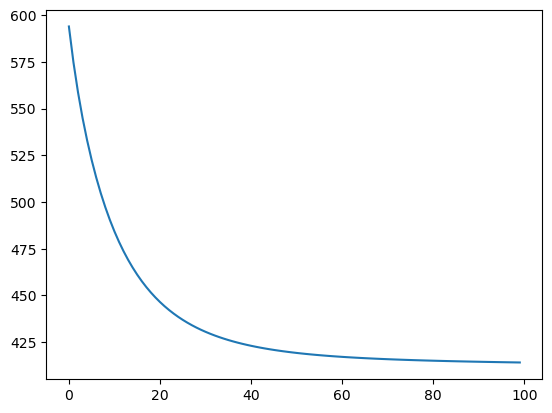

alpha = 0.5
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 419.6601149423883
theta  Pclass   -1.600364
Sex       2.206392
Age      -0.461039
SibSp    -0.236963
Parch    -0.020379
Fare      0.257407
dtype: float64


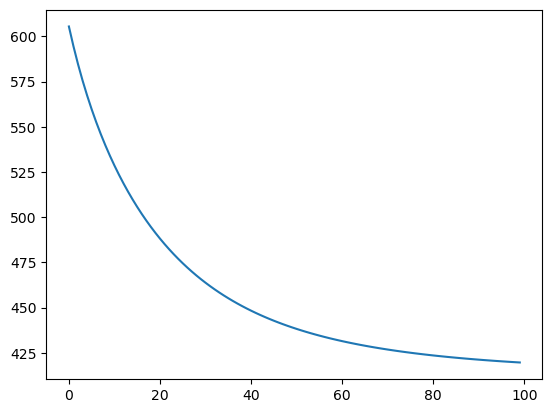

alpha = 0.1
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 492.02056318806444
theta  Pclass   -0.774065
Sex       0.818144
Age      -0.250129
SibSp    -0.063438
Parch     0.002965
Fare      0.062606
dtype: float64


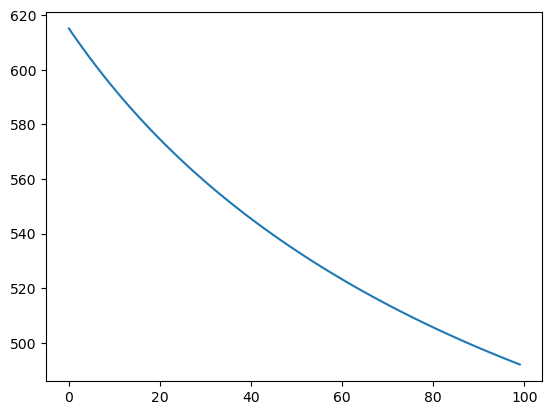

alpha = 0.05
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 534.8247106623282
theta  Pclass   -0.489716
Sex       0.431645
Age      -0.164315
SibSp    -0.037497
Parch    -0.001447
Fare      0.029909
dtype: float64


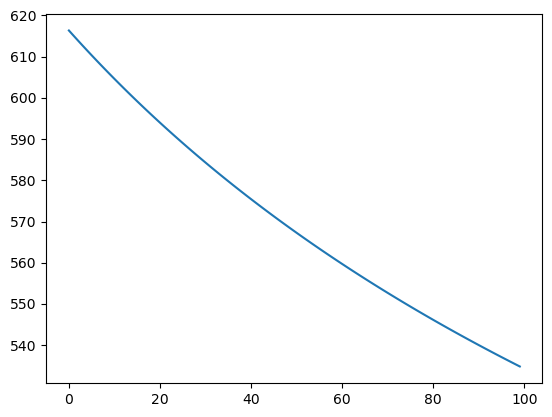

alpha = 0.01
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 595.0343675068752
theta  Pclass   -0.125722
Sex       0.086304
Age      -0.043910
SibSp    -0.009303
Parch    -0.001549
Fare      0.005176
dtype: float64


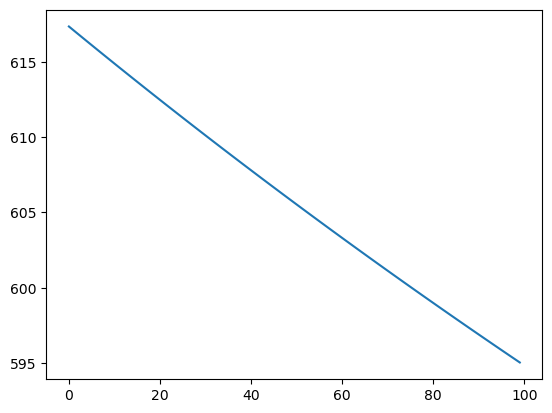

alpha = 0.005
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 605.754687550422
theta  Pclass   -0.065161
Sex       0.042934
Age      -0.022886
SibSp    -0.004809
Parch    -0.000895
Fare      0.002506
dtype: float64


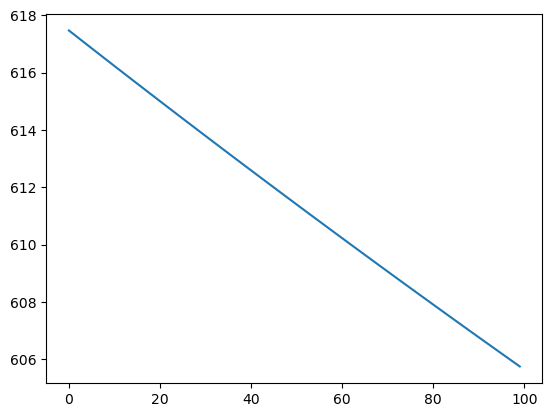

alpha = 0.001
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 615.127652630594
theta  Pclass   -0.013423
Sex       0.008542
Age      -0.004736
SibSp    -0.000989
Parch    -0.000200
Fare      0.000487
dtype: float64


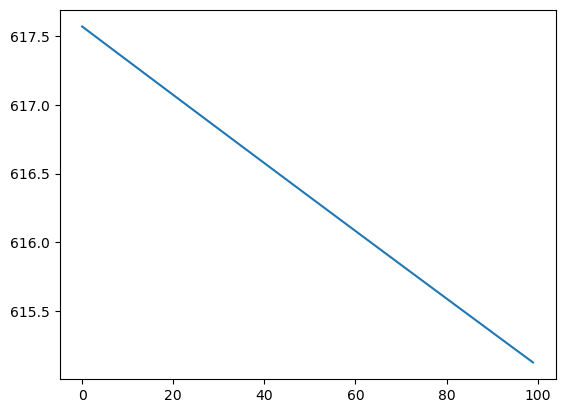

alpha = 0.0005
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 616.3544224992838
theta  Pclass   -0.006737
Sex       0.004268
Age      -0.002378
SibSp    -0.000496
Parch    -0.000101
Fare      0.000242
dtype: float64


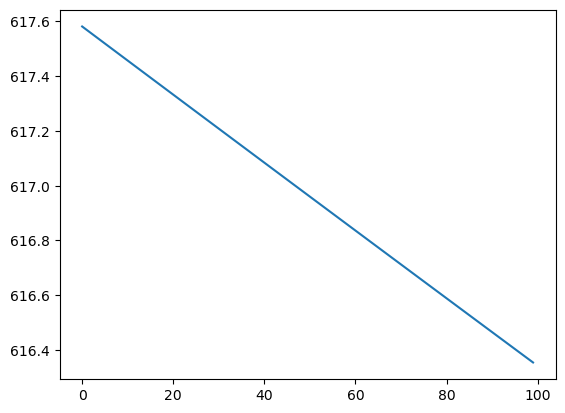

alpha = 0.0001
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 617.3451487405214
theta  Pclass   -0.001351
Sex       0.000853
Age      -0.000477
SibSp    -0.000100
Parch    -0.000021
Fare      0.000048
dtype: float64


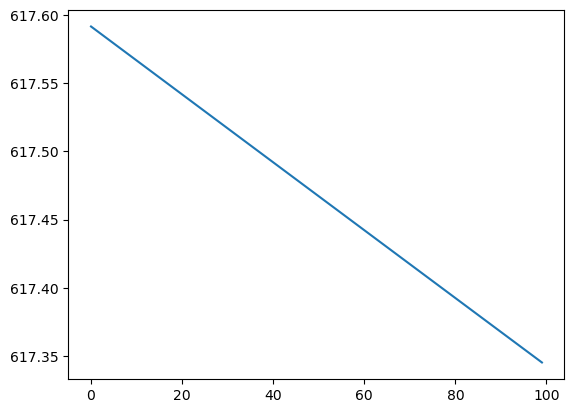

<Figure size 640x480 with 0 Axes>

In [10]:
for alpha in [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0001]:
    regres_params([0,0,0,0,0,0], X, Y, 100, alpha, True)

alpha = 1
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 414.12206297887633
theta  Pclass   -1.840371
Sex       2.582810
Age      -0.481107
SibSp    -0.432077
Parch    -0.099002
Fare      0.445067
dtype: float64


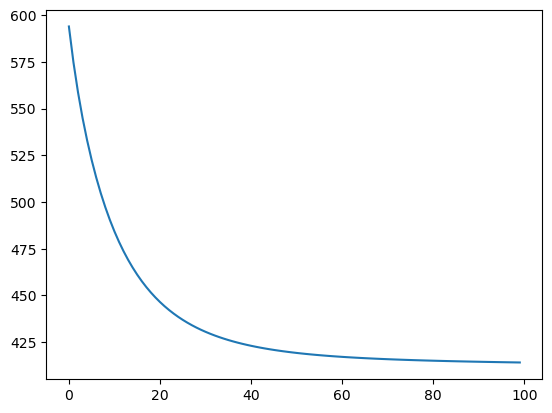

alpha = 5
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 408.62357272909253
theta  Pclass   -1.863479
Sex       2.737587
Age      -0.563310
SibSp    -1.359601
Parch    -0.456899
Fare      1.563661
dtype: float64


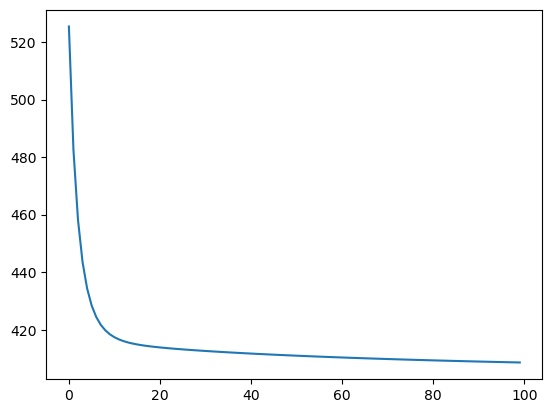

alpha = 10
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 406.52773128450843
theta  Pclass   -1.779434
Sex       2.750273
Age      -0.776878
SibSp    -1.853942
Parch    -0.583019
Fare      2.483042
dtype: float64


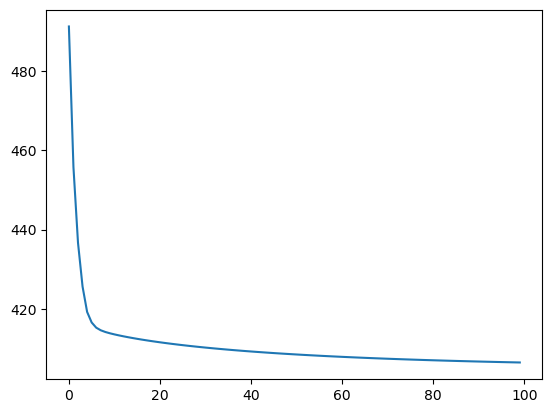

alpha = 15
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 441.9010531825723
theta  Pclass   -1.291737
Sex       3.442312
Age      -0.671403
SibSp    -2.291328
Parch    -0.654297
Fare      3.197932
dtype: float64


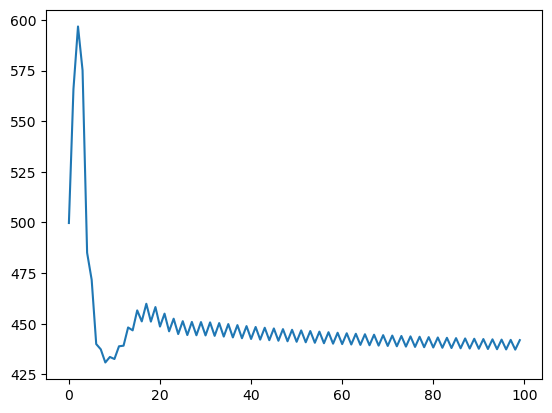

alpha = 20
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 523.8007127918779
theta  Pclass   -1.066577
Sex       4.498041
Age      -0.556164
SibSp    -3.119946
Parch    -0.806760
Fare      3.897378
dtype: float64


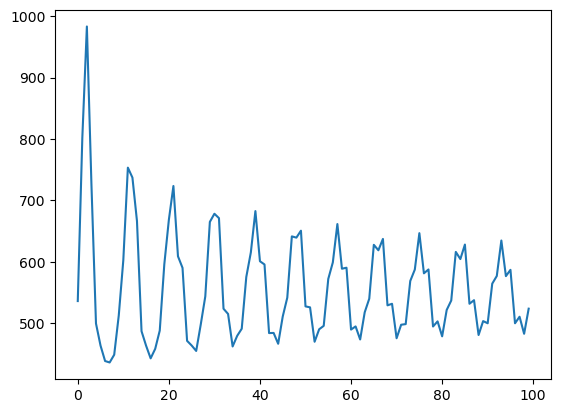

alpha = 25
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 683.9778452980065
theta  Pclass   -3.959590
Sex       2.333853
Age      -1.607186
SibSp    -3.776233
Parch    -1.374419
Fare      4.907233
dtype: float64


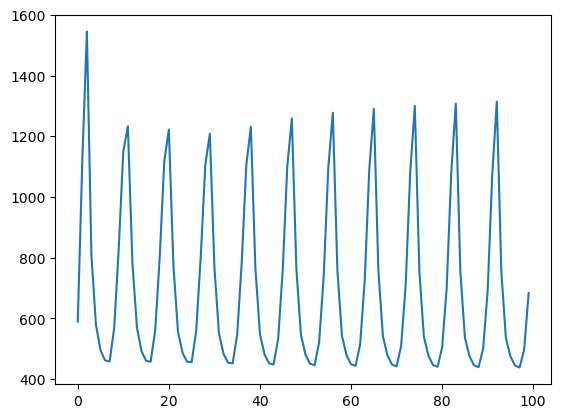

<Figure size 640x480 with 0 Axes>

In [11]:
for alpha in [1,5,10,15,20,25]:
    regres_params([0,0,0,0,0,0], X, Y, 100, alpha, True)

alpha = 10
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 406.52773128450843
theta  Pclass   -1.779434
Sex       2.750273
Age      -0.776878
SibSp    -1.853942
Parch    -0.583019
Fare      2.483042
dtype: float64


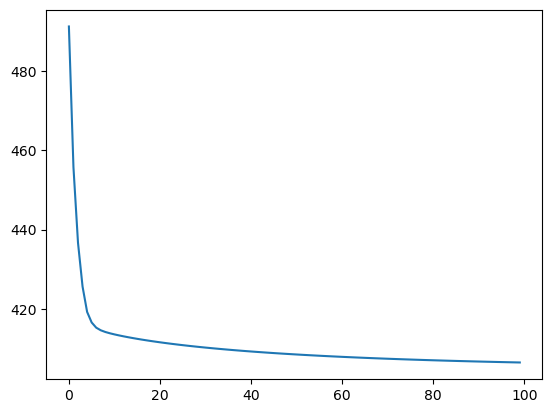

alpha = 11
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 406.3044119905024
theta  Pclass   -1.767804
Sex       2.751280
Age      -0.809159
SibSp    -1.916018
Parch    -0.597786
Fare      2.624817
dtype: float64


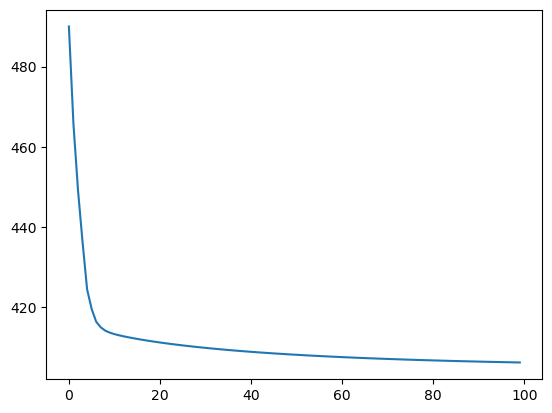

alpha = 12
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 406.1174830617407
theta  Pclass   -1.757421
Sex       2.752097
Age      -0.838538
SibSp    -1.970645
Parch    -0.611103
Fare      2.755617
dtype: float64


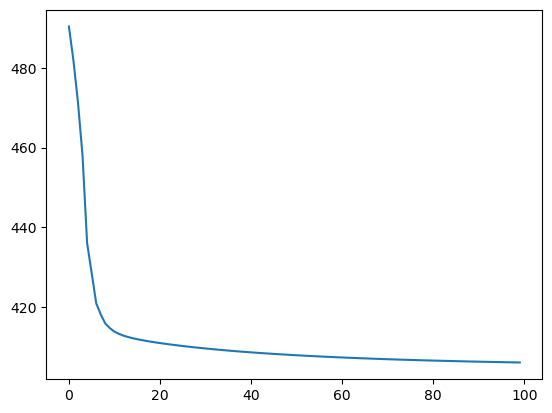

alpha = 13
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 405.9598946555236
theta  Pclass   -1.747978
Sex       2.752864
Age      -0.865323
SibSp    -2.019216
Parch    -0.623278
Fare      2.876617
dtype: float64


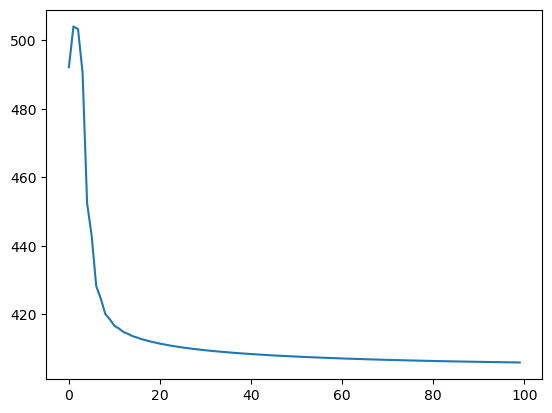

alpha = 14
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 415.7707408832546
theta  Pclass   -1.479322
Sex       3.043586
Age      -0.762607
SibSp    -2.109019
Parch    -0.624943
Fare      3.029761
dtype: float64


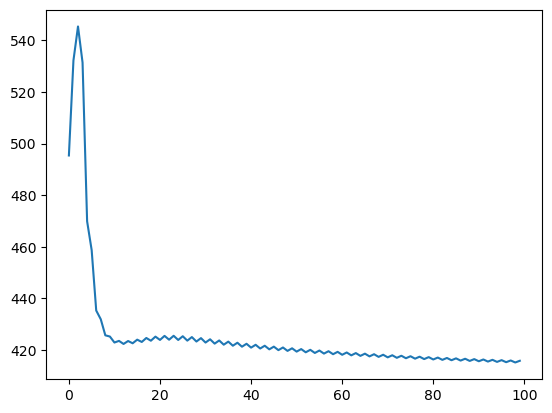

alpha = 15
num_itrerations  100
initial
cost 617.5941378789113
theta  [0, 0, 0, 0, 0, 0]

 end
cost 441.9010531825723
theta  Pclass   -1.291737
Sex       3.442312
Age      -0.671403
SibSp    -2.291328
Parch    -0.654297
Fare      3.197932
dtype: float64


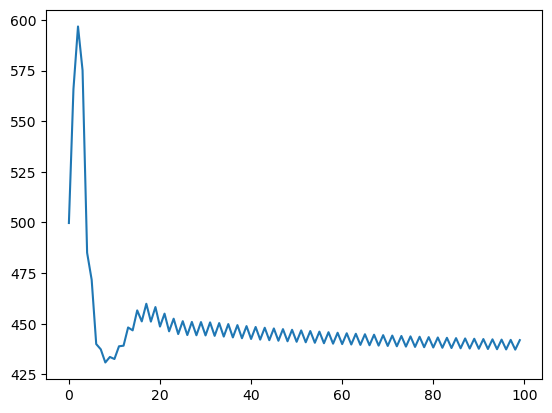

<Figure size 640x480 with 0 Axes>

In [12]:
for alpha in [10,11,12,13,14,15]:
    regres_params([0,0,0,0,0,0], X, Y, 100, alpha, True)

In [13]:
#alpha = 12 is optimal

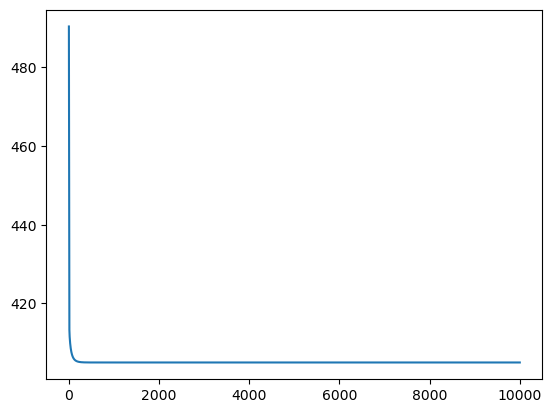

<Figure size 640x480 with 0 Axes>

In [14]:
init_theta = [0,0,0,0,0,0]
alpha = 12
itr = 10000
m = len(X)

num_run = []
cost_run = []
for i in range(itr):
    init_theta = init_theta - (alpha/m)*gradient(init_theta, X, Y)
    num_run.append(i)
    cost_run.append(CostFun(init_theta, X, Y))
plt.plot(cost_run)
plt.show()
plt.clf()


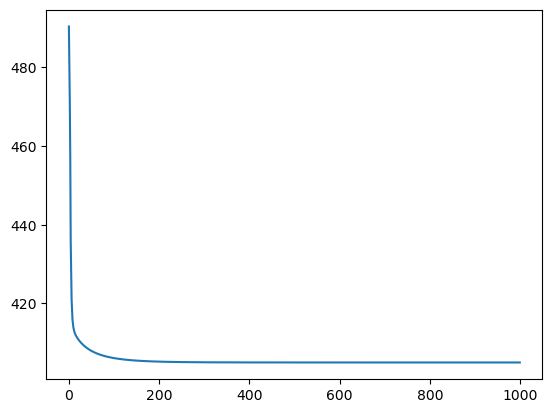

<Figure size 640x480 with 0 Axes>

In [15]:
plt.plot(cost_run[0:1000])
plt.show()
plt.clf()

plt.plot(cost_run)
plt.show()
plt.clf()

In [16]:
diff_cost_run = []
single_print = True
threshold = 1e-7
for i in range(len(cost_run)-1):
    diff_temp = cost_run[i]-cost_run[i+1]
    if diff_temp<threshold*617 and single_print:
        print('diff below {}*617 at {} iteration'.format(threshold,i))
        single_print = False
    diff_cost_run.append(diff_temp)


diff below 1e-07*617 at 467 iteration


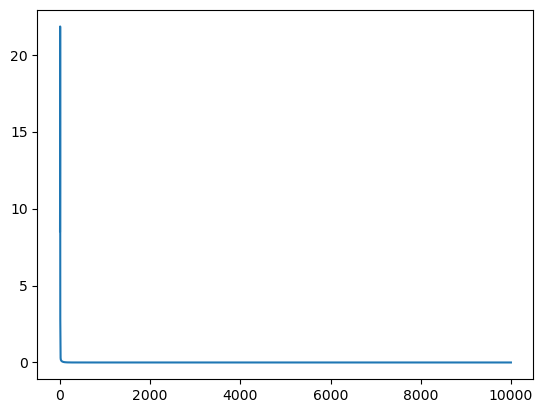

<Figure size 640x480 with 0 Axes>

In [17]:
plt.plot(diff_cost_run)
plt.show()
plt.clf()

In [18]:
# numerical features : 'Pclass','Sex','Age','SibSp','Parch','Fare'
#optimal alpha = 12
#optimal iterations = 500

In [19]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
#selecting optimal feature set

#start from one  and add features if score improves
thresh = 0.5
iterations_gradient = 500
alpha_gradient = 12
initial_features = []
unused_features = ['Pclass','Sex','Age','SibSp','Parch','Fare']
best_features = initial_features
min_improvment = 0
if len(initial_features) == 0:
    best_acc = -1
    one_feature_rez = {}
    for feature in unused_features:
        one_feature_rez[feature] = regress_feature_selection([feature], train_data1,iterations_gradient,alpha_gradient,thresh)[0]
        print('\n feature set [{}]  gives acc = {}'.format(feature, one_feature_rez[feature]))
    best_feature_temp = max(one_feature_rez , key=one_feature_rez.get)
    best_features.append(best_feature_temp)
    unused_features.remove(best_feature_temp)
    best_acc = one_feature_rez[best_feature_temp]
    print('best fetures is {}    and it gives acc = {}'.format(best_feature_temp,best_acc))
else:
    best_acc = regress_feature_selection(initial_features, train_data1,iterations_gradient,alpha_gradient,thresh)[0]

made_a_change = True
while made_a_change:
    print('\n\nNew run \n')
    made_a_change = False
    diff_list = {}
    
    for feature in unused_features:
        current_features_temp = best_features.copy()
        current_features_temp.append(feature)
        diff_list[feature] = regress_feature_selection(current_features_temp, train_data1,iterations_gradient,alpha_gradient,thresh)[0]
        
    diff_list_best = max(diff_list , key=diff_list.get)
    if min_improvment < diff_list[diff_list_best] - best_acc:
            print("adding feature {}\nprevious acc = {}     curr acc {}\n\n".format(diff_list_best,best_acc,diff_list[diff_list_best]))
            best_features.append(diff_list_best)
            unused_features.remove(diff_list_best)
            best_acc = diff_list[diff_list_best]
            made_a_change = True
    if not made_a_change:
        print('no further improvment possible')
print("\n minimal difference for an add : {}\n\nfinal acc : {}\nselected features :\n{}\n\nfeatures skiped :\n{}".format(min_improvment,best_acc,best_features,unused_features))



 feature set [Pclass]  gives acc = 0.6161616161616161

 feature set [Sex]  gives acc = 0.3838383838383838

 feature set [Age]  gives acc = 0.6161616161616161

 feature set [SibSp]  gives acc = 0.4051627384960718

 feature set [Parch]  gives acc = 0.3782267115600449

 feature set [Fare]  gives acc = 0.3838383838383838
best fetures is Pclass    and it gives acc = 0.6161616161616161


New run 

adding feature Sex
previous acc = 0.6161616161616161     curr acc 0.7867564534231201




New run 

adding feature SibSp
previous acc = 0.7867564534231201     curr acc 0.7934904601571269




New run 

adding feature Fare
previous acc = 0.7934904601571269     curr acc 0.7957351290684624




New run 

no further improvment possible

 minimal difference for an add : 0

final acc : 0.7957351290684624
selected features :
['Pclass', 'Sex', 'SibSp', 'Fare']

features skiped :
['Age', 'Parch']


In [21]:
#optimal features : ['Pclass', 'Sex', 'SibSp', 'Fare']
#optimal alpha = 12
#optimal iterations = 500

In [22]:
#idea: cabin number should have big influence on survival(some cabins are closer to the exits 
#and will be first for safeboats) but a lot of cabin numbers are missing so a good idea is to guess the missing numbers
#and do cluster analysys

In [23]:
#train_data[train_data['Cabin'].isna() == False]["Cabin"].tolist()
test2 = train_data[train_data['Cabin'].str.contains('B', na= False)].copy()
print('survival rate for all: {}\n\n'.format((100*len(train_data[train_data['Survived'] == True]))/len(train_data)))
for i in ['A','B','C','D','E','F']:
    test2 = train_data[train_data['Cabin'].str.contains(i, na= False)].copy()
    print('for cabin starting in {}\n total num of tickes with cabin type: {}\n percentage of people with that cabin type that survived: {}\n'.format(
    i, len(test2), (100*len(test2[test2['Survived'] == True]))/len(test2)))

survival rate for all: 38.38383838383838


for cabin starting in A
 total num of tickes with cabin type: 15
 percentage of people with that cabin type that survived: 46.666666666666664

for cabin starting in B
 total num of tickes with cabin type: 47
 percentage of people with that cabin type that survived: 74.46808510638297

for cabin starting in C
 total num of tickes with cabin type: 59
 percentage of people with that cabin type that survived: 59.32203389830509

for cabin starting in D
 total num of tickes with cabin type: 33
 percentage of people with that cabin type that survived: 75.75757575757575

for cabin starting in E
 total num of tickes with cabin type: 33
 percentage of people with that cabin type that survived: 75.75757575757575

for cabin starting in F
 total num of tickes with cabin type: 13
 percentage of people with that cabin type that survived: 61.53846153846154



In [24]:
for i in ['A','B','C','D','E','F']:
    print('\naverage fare for people in cabin with {} is {}'.format(i, train_data[train_data['Cabin'].str.contains(i, na= False)]['Fare'].mean()))


average fare for people in cabin with A is 39.623886666666664

average fare for people in cabin with B is 113.50576382978724

average fare for people in cabin with C is 100.1513406779661

average fare for people in cabin with D is 57.24457575757575

average fare for people in cabin with E is 45.3094696969697

average fare for people in cabin with F is 18.69679230769231
